In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [3]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [4]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

In [5]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

# EDA

In [6]:
df.describe(include=[np.number])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.describe(include=[np.object_]).transpose()

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [9]:
# df.isna().sum()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

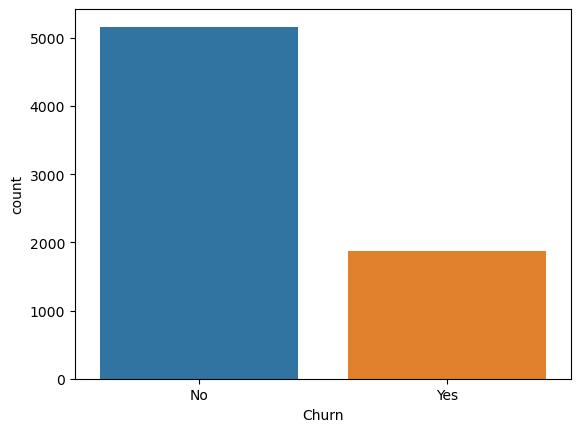

In [10]:
sns.countplot(data=df , x='Churn' , hue='Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

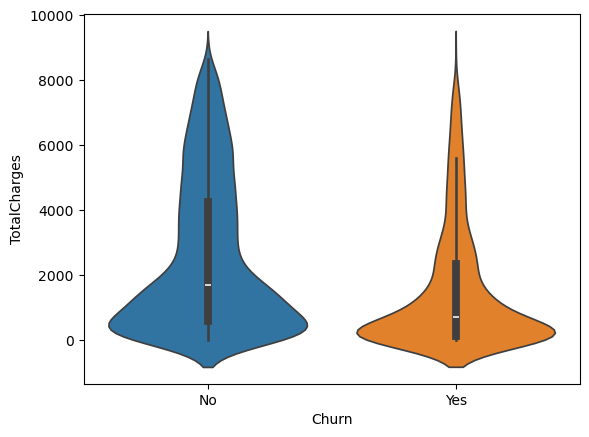

In [11]:
sns.violinplot(data=df , x='Churn' , y='TotalCharges' , hue='Churn')

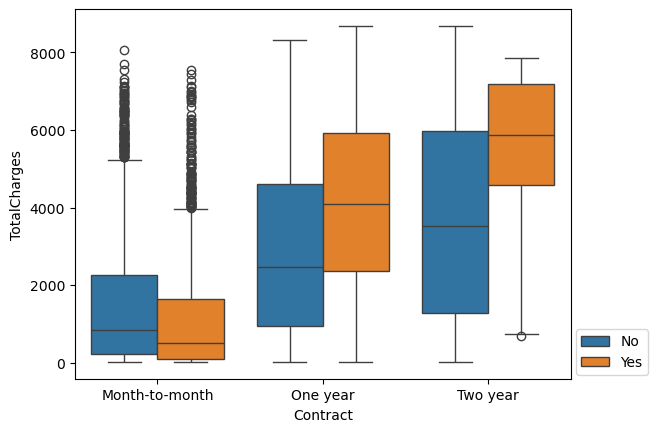

In [12]:
sns.boxplot(data=df , x='Contract' , y='TotalCharges' , hue='Churn')
plt.legend(loc=(1.01 , 0.01))

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df_corr=pd.get_dummies(df[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                       'PaymentMethod', 'Churn']]).corr()
corr_churn_yes=df_corr['Churn_Yes'].sort_values().iloc[1:-1]
corr_churn_yes

Contract_Two year                         -0.301552
StreamingTV_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
StreamingMovies_No internet service       -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
DeviceProtection_No internet service      -0.227578
TechSupport_No internet service           -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

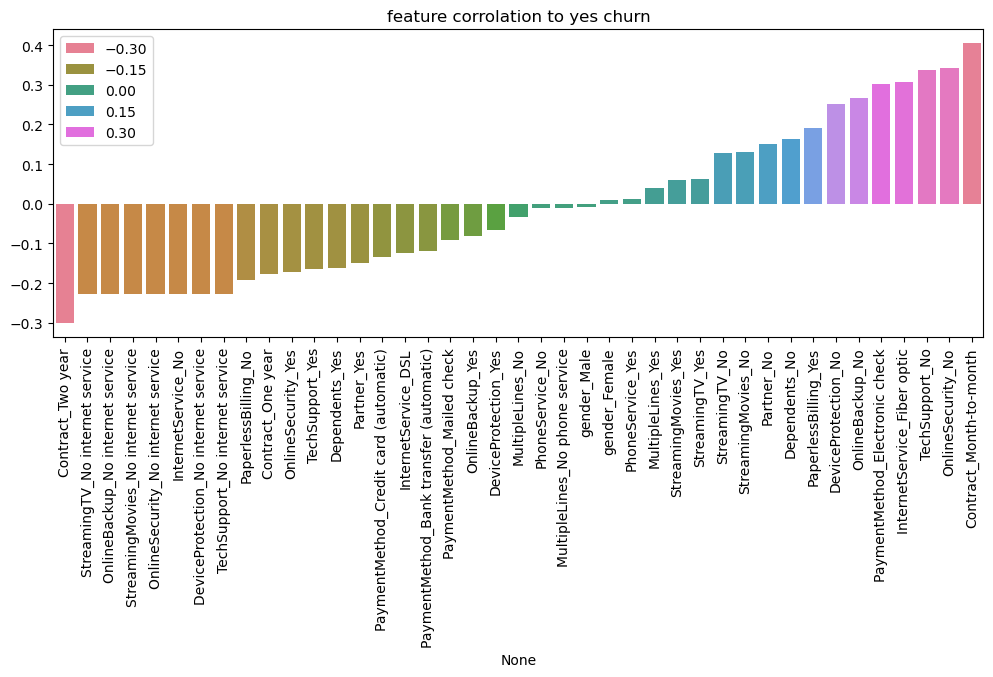

In [15]:
plt.figure(figsize=(12,4))
sns.barplot(x=corr_churn_yes.index ,y=corr_churn_yes.values, hue=corr_churn_yes.values, palette='husl')
plt.title('feature corrolation to yes churn')
plt.xticks(rotation=90);

# cohort analysis

<Axes: xlabel='tenure', ylabel='Count'>

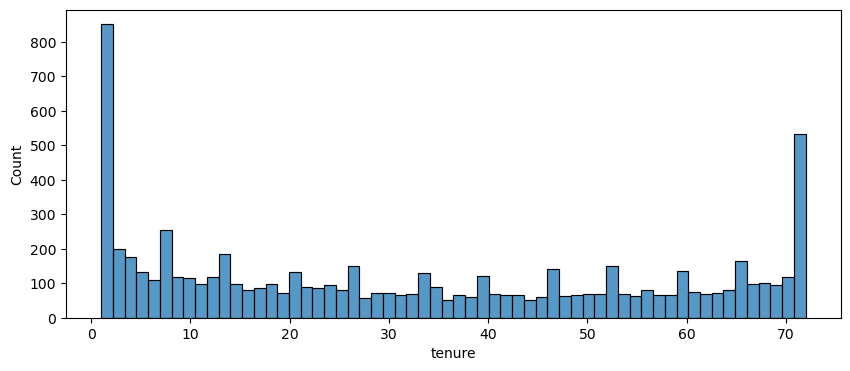

In [16]:
plt.figure(figsize=(10,4))
sns.histplot(data=df , x='tenure' , bins=60 )

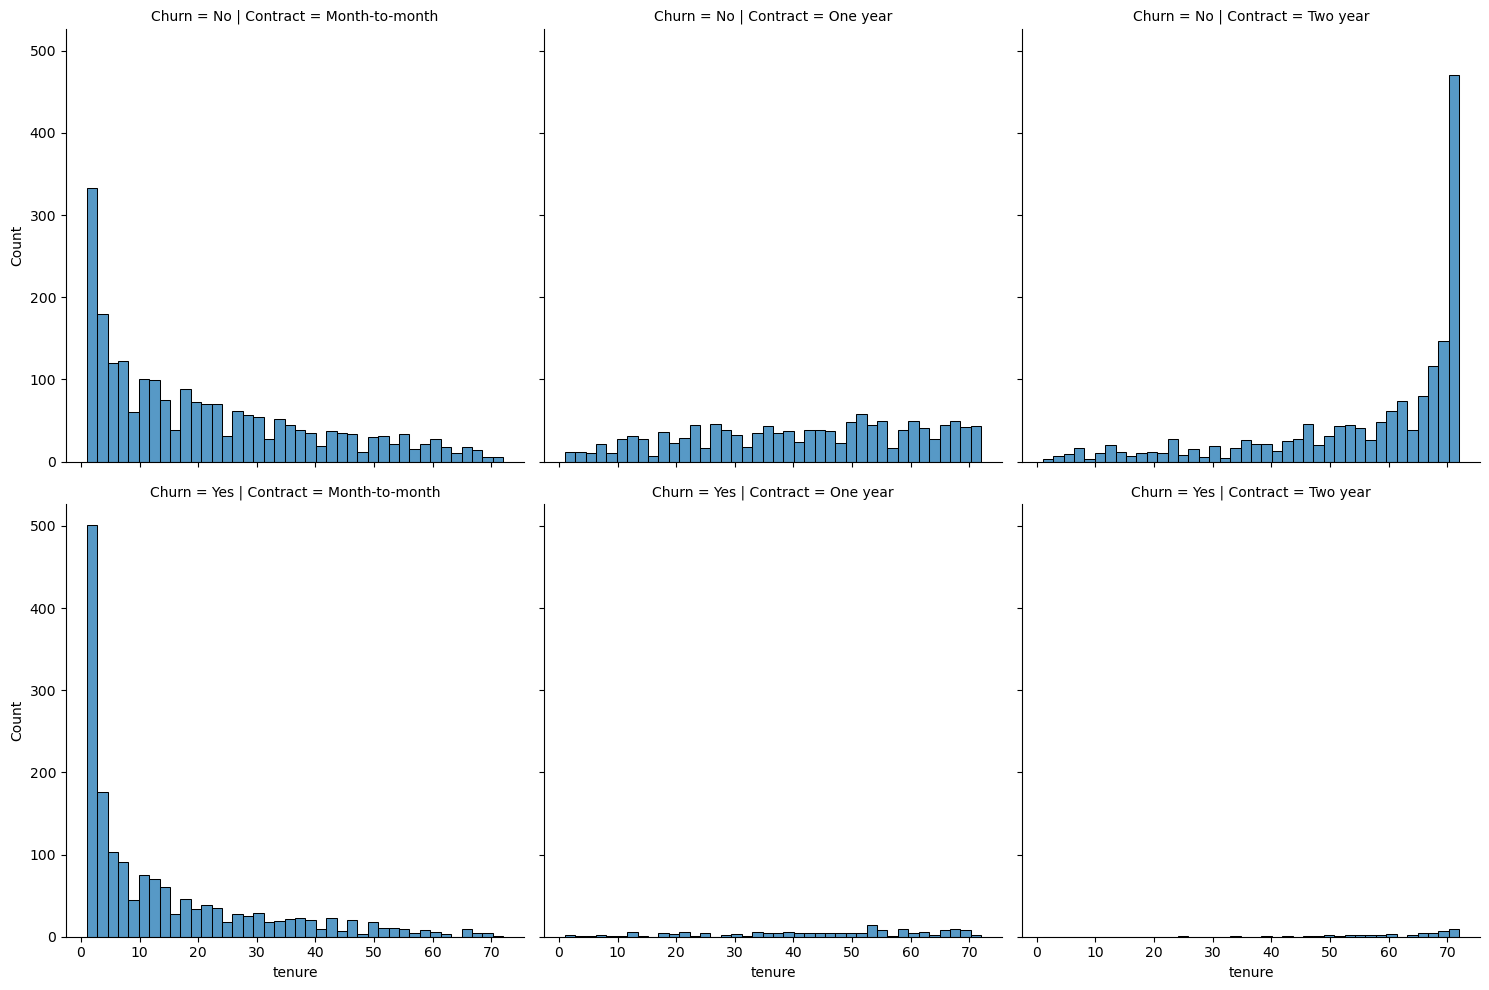

In [17]:
sns.displot(data=df , x='tenure' , row='Churn' , col='Contract'  , bins=40)

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

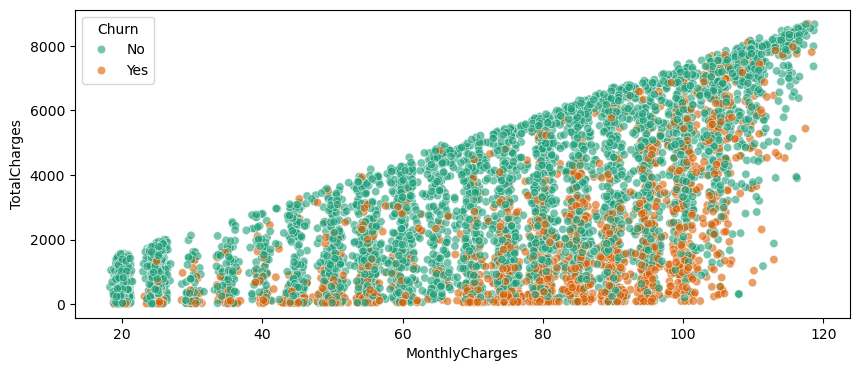

In [18]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=df , x='MonthlyCharges' , y='TotalCharges' , hue='Churn' , lw=0.5 , alpha=0.6 , palette='Dark2')

In [19]:
no_churn=df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn=df.groupby(['Churn' , 'tenure']).count().transpose()['Yes']
no_churn 

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [20]:
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [21]:
churn_rate=(yes_churn/(yes_churn+no_churn))*100
churn_rate=churn_rate.transpose()['customerID']
churn_rate

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

Text(0, 0.5, 'churn percentage')

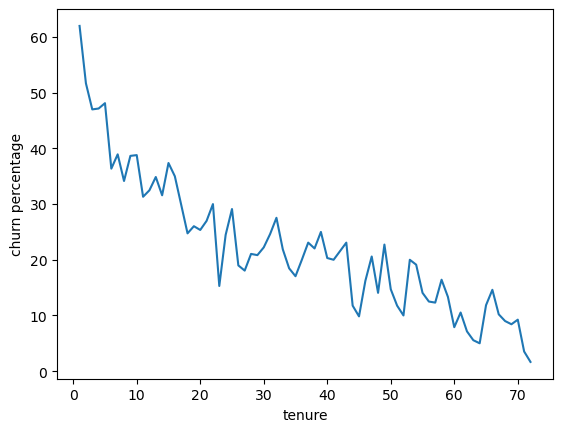

In [22]:
plt.plot(churn_rate)
plt.xlabel('tenure')
plt.ylabel('churn percentage')

In [24]:
def cohort_year(tenure):
    if tenure<13 :
        return 'one_year'
    elif tenure <25:
        return 'two_years'
    elif tenure <37:
        return 'three_years'
    else :
        return 'over_three_years'

df['cohort_tenure']=df['tenure'].apply(cohort_year)
df[['tenure','cohort_tenure']]

,tenure,cohort_tenure
0,1,one_year
1,34,three_years
2,2,one_year
3,45,over_three_years
4,2,one_year
...,...,...
7027,24,two_years
7028,72,over_three_years
7029,11,one_year
7030,4,one_year


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

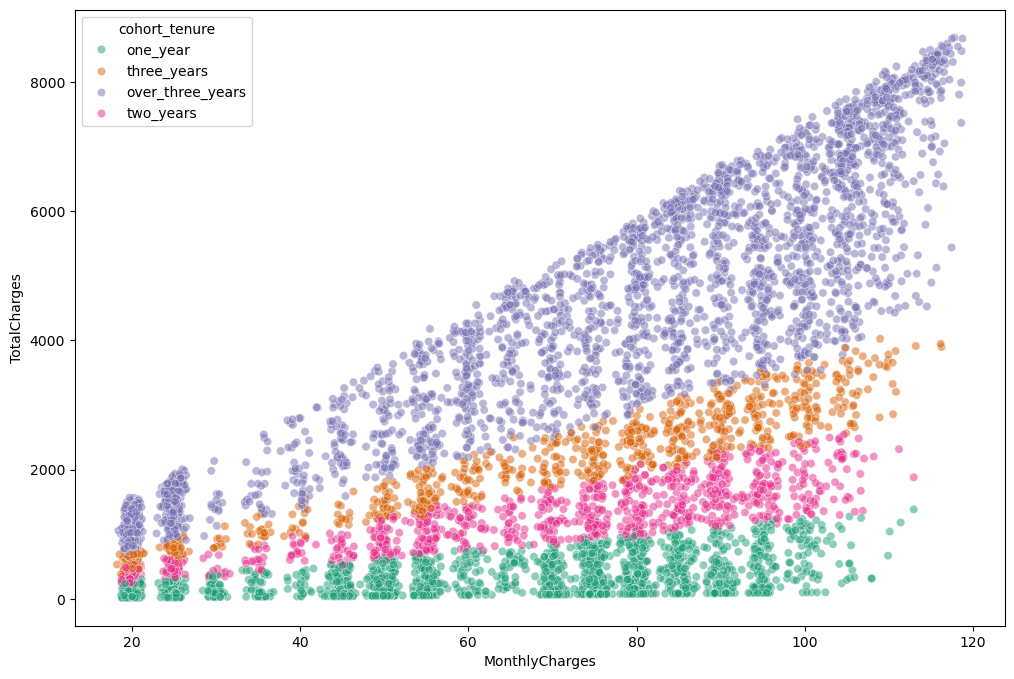

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df , x='MonthlyCharges' , y='TotalCharges' , hue='cohort_tenure' , palette='Dark2' , lw=0.5 , alpha=0.5)

<Axes: xlabel='cohort_tenure', ylabel='count'>

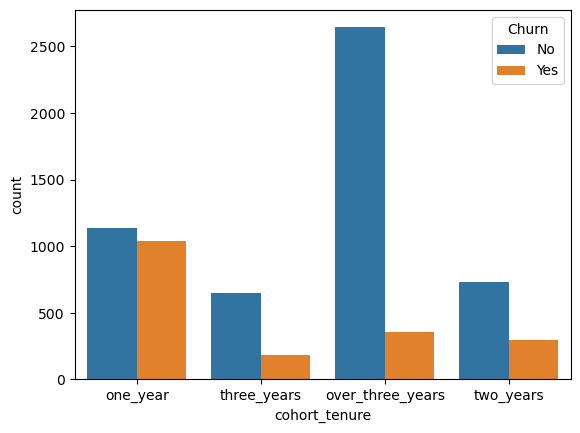

In [28]:
sns.countplot(data=df , x='cohort_tenure' , hue='Churn')

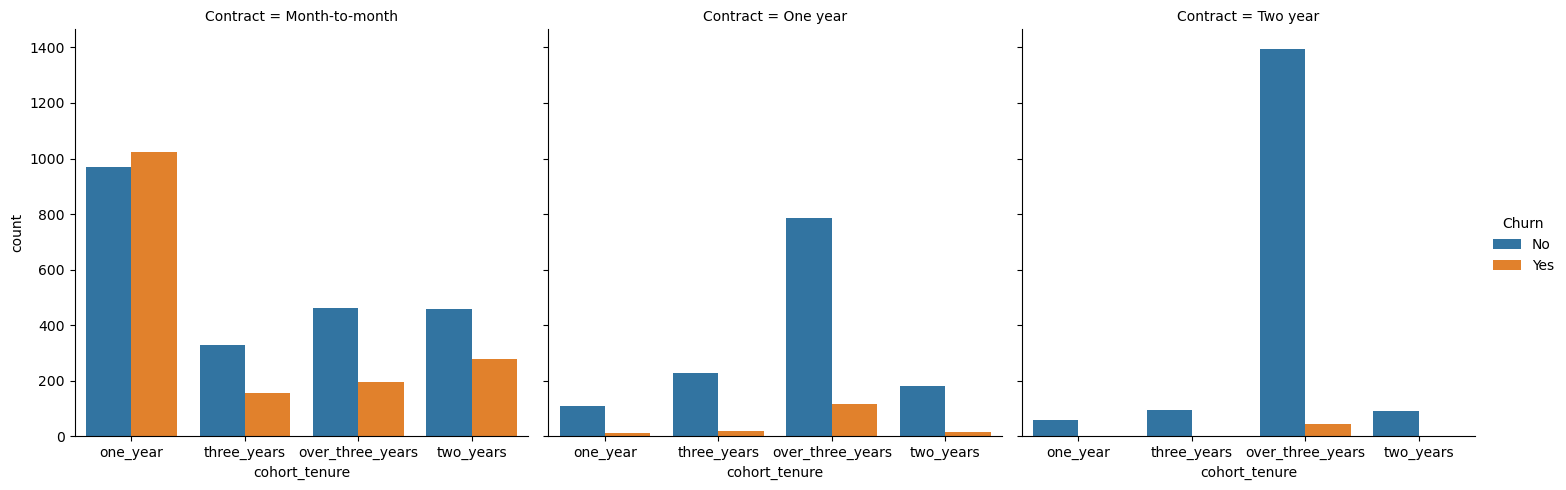

In [31]:
sns.catplot(data=df , x='cohort_tenure' , hue='Churn' , col='Contract' , kind='count')

# train test split

In [38]:
X=df.drop(['Churn' , 'customerID' , 'cohort_tenure'] , axis=1)
X=pd.get_dummies(X , drop_first=True)   
y=df['Churn']
len(X.columns)

30

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay , classification_report

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
tree_model=DecisionTreeClassifier(max_depth=6)
#param_grid={'max_depth':[1,3,6,8,10], 'max_features':[4,8,16,20,25,30]}
#grid_model=GridSearchCV(tree_model , param_grid , cv=10)
tree_model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=6)

In [41]:
#grid_model.best_params_

{'max_depth': 6, 'max_features': 8}

In [49]:
tree_pred=tree_model.predict(X_test)

In [50]:
print(classification_report(y_test , tree_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



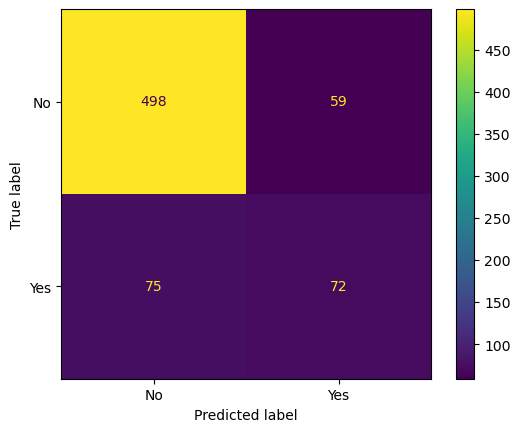

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test , tree_pred)

In [63]:
imp_features=pd.DataFrame(data=tree_model.feature_importances_ , index=X.columns , columns=['importance']).sort_values('importance')
imp_features=imp_features[imp_features['importance']>0]
imp_features

,importance
gender_Male,0.001237
OnlineBackup_Yes,0.005341
PhoneService_Yes,0.007852
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
MultipleLines_Yes,0.012432
SeniorCitizen,0.012680
TechSupport_No internet service,0.026290
Contract_Two year,0.027065


Text(0.5, 1.0, 'feature importance for decision tree')

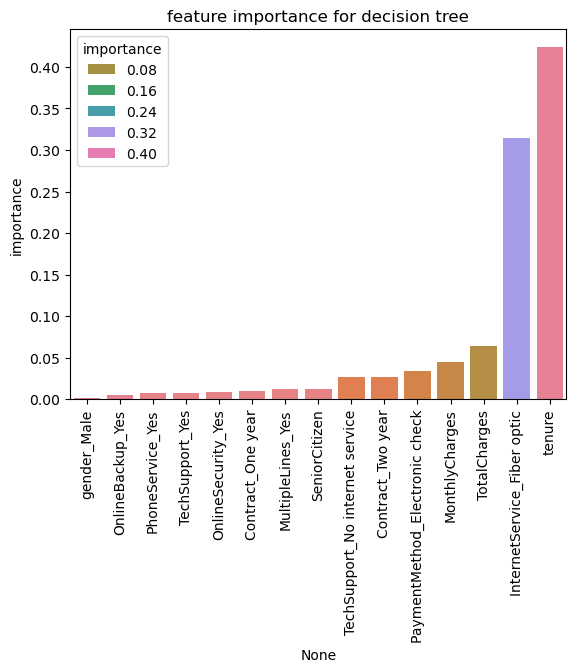

In [74]:
sns.barplot(data=imp_features , x=imp_features.index , y='importance' , hue='importance' , palette='husl')
plt.xticks(rotation=90);
plt.title('feature importance for decision tree')

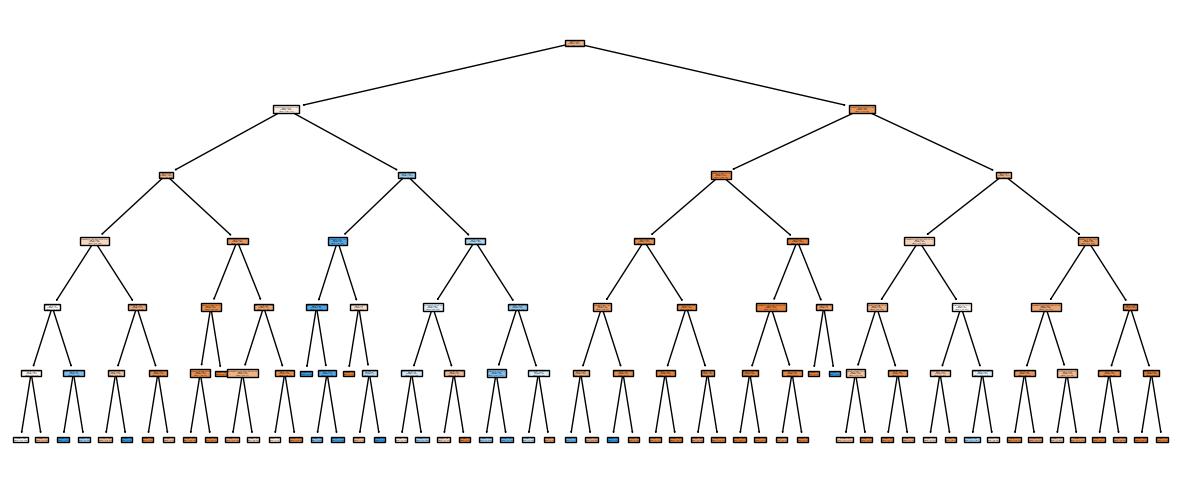

In [72]:
plt.figure(figsize=(15,6))
plot_tree(tree_model , filled=True , feature_names=X.columns);

# random_forest

In [75]:
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train , y_train)
rf_pred=rf_model.predict(X_test)

In [76]:
print(classification_report(y_test , rf_pred))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87       557
         Yes       0.50      0.42      0.46       147

    accuracy                           0.79       704
   macro avg       0.68      0.66      0.66       704
weighted avg       0.78      0.79      0.78       704



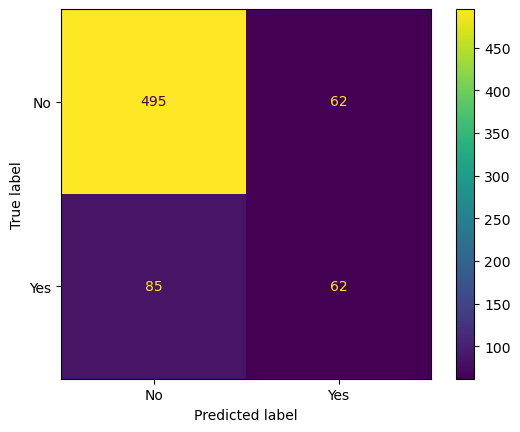

In [77]:
ConfusionMatrixDisplay.from_predictions(y_test , rf_pred)

In [79]:
imp_rf=pd.DataFrame(data=rf_model.feature_importances_ , index=X.columns , columns=['imp_rf'])
imp_rf=imp_rf[imp_rf['imp_rf']>0].sort_values('imp_rf')
imp_rf

,imp_rf
StreamingTV_No internet service,0.003078
StreamingMovies_No internet service,0.003488
MultipleLines_No phone service,0.004134
PhoneService_Yes,0.004189
InternetService_No,0.004333
DeviceProtection_No internet service,0.004943
OnlineBackup_No internet service,0.006307
TechSupport_No internet service,0.007269
OnlineSecurity_No internet service,0.007356
PaymentMethod_Mailed check,0.011632


Text(0.5, 1.0, 'feature importance for random forest')

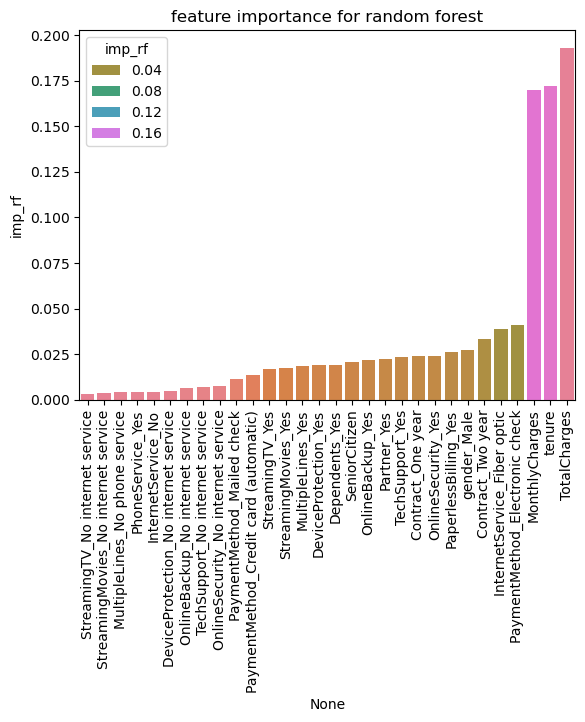

In [81]:
sns.barplot(data=imp_rf , x=imp_rf.index , y='imp_rf' , hue='imp_rf' , palette='husl')
plt.xticks(rotation=90);
plt.title('feature importance for random forest')

# Adaboost classifier

In [82]:
ada_model=AdaBoostClassifier(n_estimators=50 , algorithm='SAMME')
ada_model.fit(X_train , y_train)
ada_pred=ada_model.predict(X_test)

In [83]:
print(classification_report(y_test , ada_pred))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.51      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



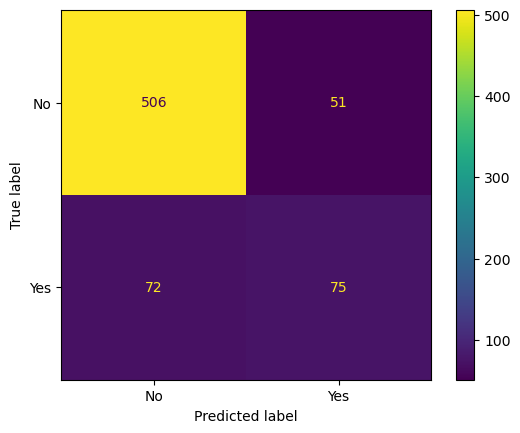

In [84]:
ConfusionMatrixDisplay.from_predictions(y_test , ada_pred)

In [86]:
imp_ada=pd.DataFrame(data=ada_model.feature_importances_ , index=X.columns , columns=['ada_imp'])
imp_ada=imp_ada[imp_ada['ada_imp']>0].sort_values('ada_imp')
imp_ada

,ada_imp
TechSupport_Yes,0.007048
OnlineBackup_No internet service,0.009667
OnlineSecurity_Yes,0.010921
StreamingTV_No internet service,0.015132
MultipleLines_Yes,0.015952
MonthlyCharges,0.016037
StreamingMovies_Yes,0.016957
StreamingTV_Yes,0.017871
TotalCharges,0.018273
MultipleLines_No phone service,0.020066


Text(0.5, 1.0, 'feature importance for adaboost classification')

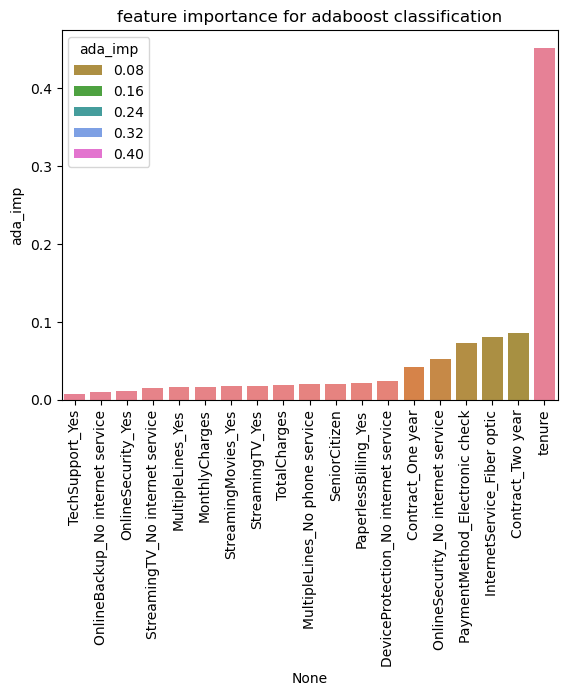

In [87]:
sns.barplot(data=imp_ada , x=imp_ada.index , y='ada_imp' , hue='ada_imp' , palette='husl')
plt.xticks(rotation=90);
plt.title('feature importance for adaboost classification')

# Gradient boost classifier

In [88]:
gb_model=GradientBoostingClassifier()
gb_model.fit(X_train , y_train)
gb_pred=gb_model.predict(X_test)

In [89]:
print(classification_report(y_test , gb_pred))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



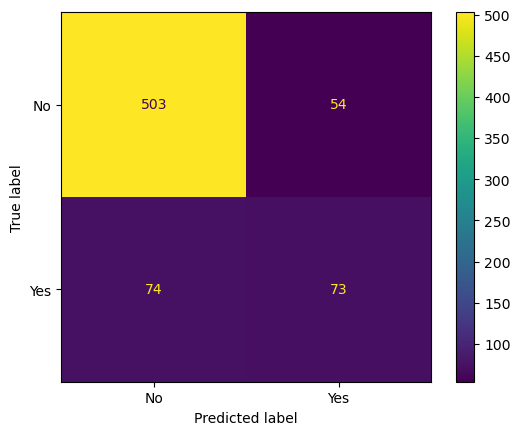

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test , gb_pred)

In [91]:
gb_imp=pd.DataFrame(data=gb_model.feature_importances_ , index=X.columns , columns=['gb_imp'])
gb_imp=gb_imp[gb_imp['gb_imp']>0].sort_values('gb_imp')
gb_imp

,gb_imp
InternetService_No,0.000239
gender_Male,0.000418
PaymentMethod_Mailed check,0.000569
Dependents_Yes,0.000612
PaymentMethod_Credit card (automatic),0.000886
OnlineBackup_Yes,0.001440
DeviceProtection_Yes,0.001786
MultipleLines_No phone service,0.002912
PhoneService_Yes,0.003743
MultipleLines_Yes,0.004182


Text(0.5, 1.0, 'feature importance for gradient boost classifier')

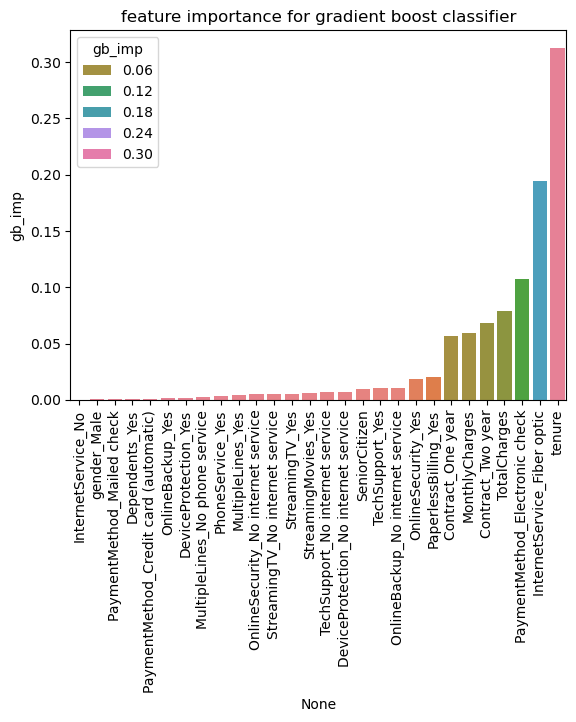

In [92]:
sns.barplot(data=gb_imp , x=gb_imp.index , y='gb_imp' , hue='gb_imp' , palette='husl')
plt.xticks(rotation=90);
plt.title('feature importance for gradient boost classifier')